# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 606


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?appid="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}{weather_api_key}&units=metric&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bredasdorp
Processing Record 2 of Set 1 | polyarnyy
Processing Record 3 of Set 1 | adamstown
Processing Record 4 of Set 1 | avarua
Processing Record 5 of Set 1 | port elizabeth
Processing Record 6 of Set 1 | ilulissat
Processing Record 7 of Set 1 | thompson
Processing Record 8 of Set 1 | isafjordur
Processing Record 9 of Set 1 | massawa
Processing Record 10 of Set 1 | albany
Processing Record 11 of Set 1 | yellowknife
Processing Record 12 of Set 1 | la'ie
Processing Record 13 of Set 1 | east london
Processing Record 14 of Set 1 | port lincoln
Processing Record 15 of Set 1 | keetmanshoop
Processing Record 16 of Set 1 | pisco
Processing Record 17 of Set 1 | taiohae
City not found. Skipping...
Processing Record 18 of Set 1 | bilibino
Processing Record 19 of Set 1 | fort st. john
Processing Record 20 of Set 1 | bethel
Processing Record 21 of Set 1 | grytviken
Processing Record 22 of Set 1 | gadzhiyev

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          582
Lat           582
Lng           582
Max Temp      582
Humidity      582
Cloudiness    582
Wind Speed    582
Country       582
Date          582
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bredasdorp,-34.5322,20.0403,10.34,72,7,7.71,ZA,1692771141
1,polyarnyy,69.1989,33.4478,9.86,77,98,1.33,RU,1692771142
2,adamstown,-25.0660,-130.1015,19.05,62,92,11.64,PN,1692771142
3,avarua,-21.2078,-159.7750,23.03,73,75,2.57,CK,1692771143
4,port elizabeth,-33.9180,25.5701,13.39,87,20,10.80,ZA,1692771143


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bredasdorp,-34.5322,20.0403,10.34,72,7,7.71,ZA,1692771141
1,polyarnyy,69.1989,33.4478,9.86,77,98,1.33,RU,1692771142
2,adamstown,-25.0660,-130.1015,19.05,62,92,11.64,PN,1692771142
3,avarua,-21.2078,-159.7750,23.03,73,75,2.57,CK,1692771143
4,port elizabeth,-33.9180,25.5701,13.39,87,20,10.80,ZA,1692771143


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

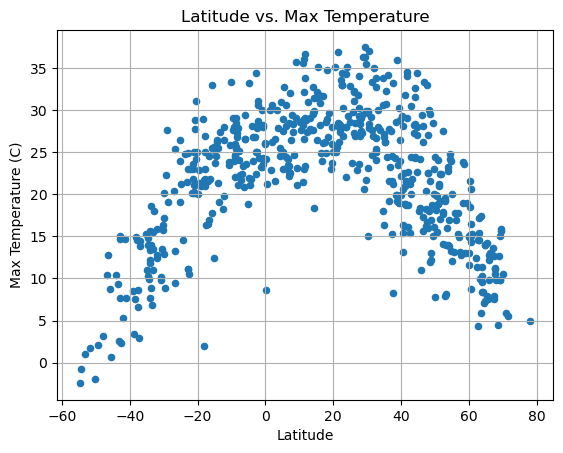

In [8]:
# Build scatter plot for latitude vs. temperature
lat_temp = city_data_df.plot(
    kind="scatter", x="Lat", y="Max Temp", title="Latitude vs. Max Temperature")

# Incorporate the other graph properties
lat_temp.set_xlabel("Latitude")
lat_temp.set_ylabel("Max Temperature (C)")
lat_temp.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

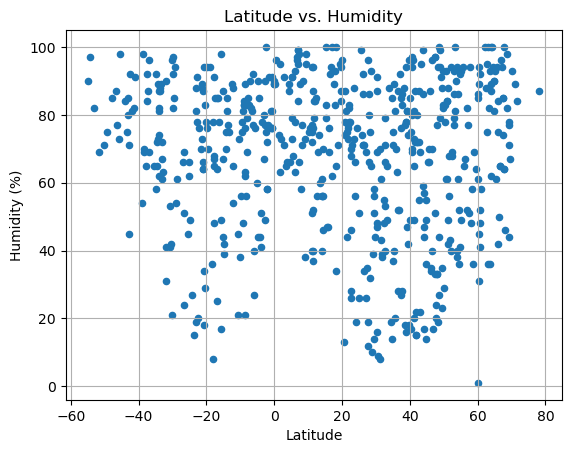

In [9]:
# Build the scatter plots for latitude vs. humidity
lat_humid = city_data_df.plot(
    kind="scatter", x="Lat", y="Humidity", title="Latitude vs. Humidity")

# Incorporate the other graph properties
lat_humid.set_xlabel("Latitude")
lat_humid.set_ylabel("Humidity (%)")
lat_humid.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

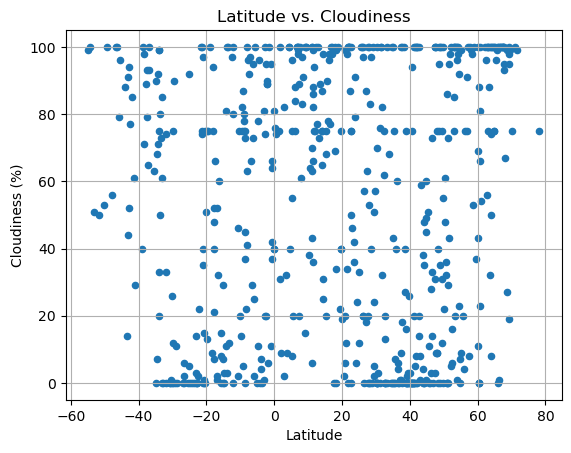

In [10]:
# Build the scatter plots for latitude vs. cloudiness
lat_cloud = city_data_df.plot(
    kind="scatter", x="Lat", y="Cloudiness", title="Latitude vs. Cloudiness")

# Incorporate the other graph properties
lat_cloud.set_xlabel("Latitude")
lat_cloud.set_ylabel("Cloudiness (%)")
lat_cloud.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

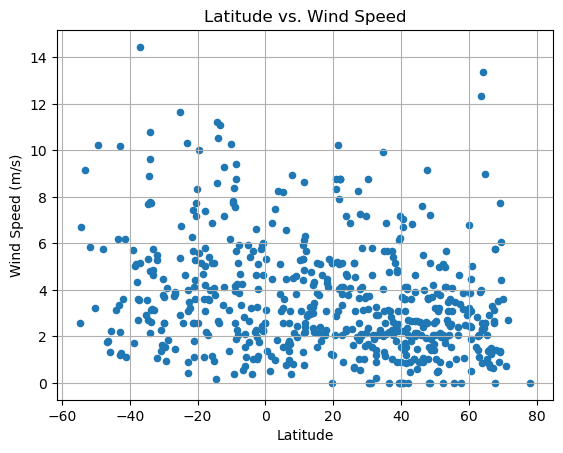

In [11]:
# Build the scatter plots for latitude vs. wind speed
lat_wind = city_data_df.plot(
    kind="scatter", x="Lat", y="Wind Speed", title="Latitude vs. Wind Speed")

# Incorporate the other graph properties
lat_wind.set_xlabel("Latitude")
lat_wind.set_ylabel("Wind Speed (m/s)")
lat_wind.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [149]:
# Define a function to create Linear Regression plots
def linreg_plot(ax_object, x_values, y_values, x_coord, y_coord):
    # Calculate linear regression for x- and y-values
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    # Get regression values and equation
    regression_values = x_values * slope + intercept
    line_equation = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

    # Calculate the r-value
    print(f"The r-value is: {rvalue**2}")
    
    # Plot linear regression
    ax_object.plot(x_values, regression_values, color="red")
    ax_object.annotate(line_equation, xy=(x_coord, y_coord), xycoords='figure points', fontsize=15, color='red', weight='bold')
    plt.show()

In [150]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,polyarnyy,69.1989,33.4478,9.86,77,98,1.33,RU,1692771142
5,ilulissat,69.2167,-51.1000,15.01,44,19,7.72,GL,1692771144
6,thompson,55.7435,-97.8558,13.09,94,20,0.00,CA,1692771144
7,isafjordur,66.0755,-23.1240,9.82,84,100,1.42,IS,1692771144
8,massawa,15.6097,39.4500,35.10,47,90,2.14,ER,1692771145


In [151]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bredasdorp,-34.5322,20.0403,10.34,72,7,7.71,ZA,1692771141
2,adamstown,-25.0660,-130.1015,19.05,62,92,11.64,PN,1692771142
3,avarua,-21.2078,-159.7750,23.03,73,75,2.57,CK,1692771143
4,port elizabeth,-33.9180,25.5701,13.39,87,20,10.80,ZA,1692771143
12,east london,-33.0153,27.9116,15.52,72,0,4.63,ZA,1692771147


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.47534311473020263


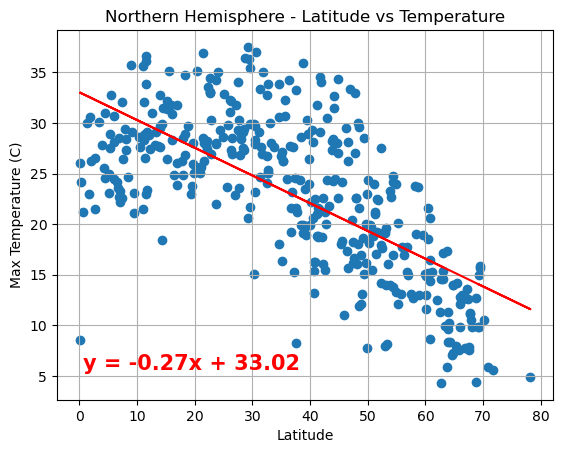

In [152]:
# Linear regression on Northern Hemisphere
x_north_temp = northern_hemi_df['Lat']
y_north_temp = northern_hemi_df['Max Temp']

fig_north_temp, ax_north_temp = plt.subplots()
ax_north_temp.scatter(x_north_temp, y_north_temp)
plt.title("Northern Hemisphere - Latitude vs Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

linreg_plot(ax_north_temp, x_north_temp, y_north_temp, 60, 60)

The r-value is: 0.6831916911514957


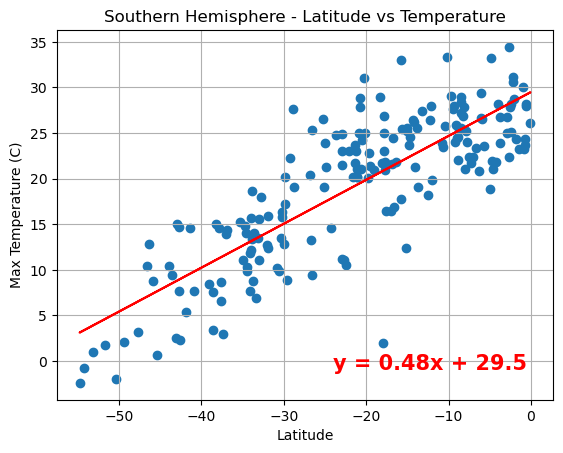

In [153]:
# Linear regression on Southern Hemisphere
x_south_temp = southern_hemi_df['Lat']
y_south_temp = southern_hemi_df['Max Temp']

fig_south_temp, ax_south_temp = plt.subplots()
ax_south_temp.scatter(x_south_temp, y_south_temp)
plt.title("Southern Hemisphere - Latitude vs Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

linreg_plot(ax_south_temp, x_south_temp, y_south_temp, 240, 60)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.0014017868880930276


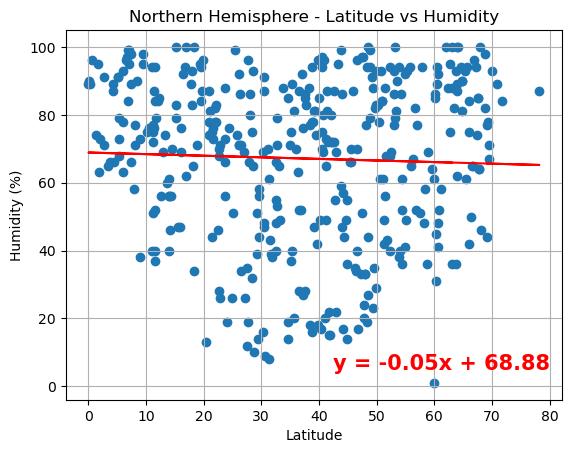

In [154]:
# Northern Hemisphere
x_north_humid = northern_hemi_df['Lat']
y_north_humid = northern_hemi_df['Humidity']

fig_north_humid, ax_north_humid = plt.subplots()
ax_north_humid.scatter(x_north_humid, y_north_humid)
plt.title("Northern Hemisphere - Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

linreg_plot(ax_north_humid, x_north_humid, y_north_humid, 240, 60)

The r-value is: 0.013233218250295163


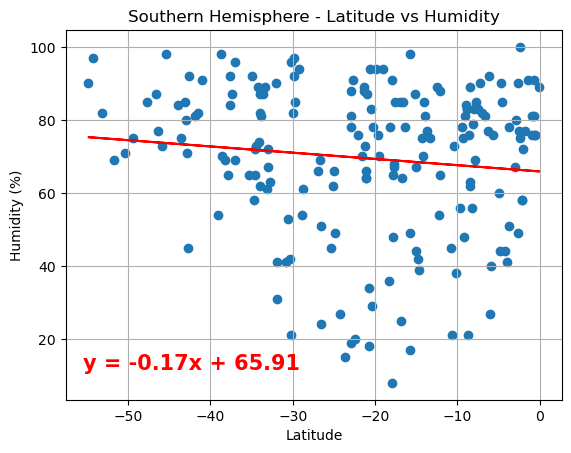

In [155]:
# Southern Hemisphere
x_south_humid = southern_hemi_df['Lat']
y_south_humid = southern_hemi_df['Humidity']

fig_south_humid, ax_south_humid = plt.subplots()
ax_south_humid.scatter(x_south_humid, y_south_humid)
plt.title("Southern Hemisphere - Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

linreg_plot(ax_south_humid, x_south_humid, y_south_humid, 60, 60)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 2.1110470248754273e-05


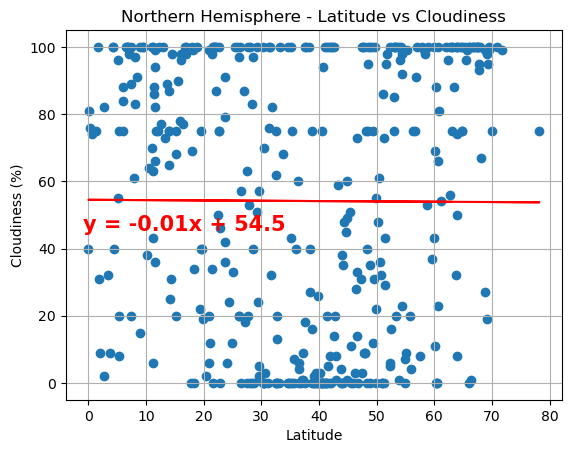

In [156]:
# Northern Hemisphere
x_north_cloud = northern_hemi_df['Lat']
y_north_cloud = northern_hemi_df['Cloudiness']

fig_north_cloud, ax_north_cloud = plt.subplots()
ax_north_cloud.scatter(x_north_cloud, y_north_cloud)
plt.title("Northern Hemisphere - Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

linreg_plot(ax_north_cloud, x_north_cloud, y_north_cloud, 60, 160)

The r-value is: 0.014968463245459102


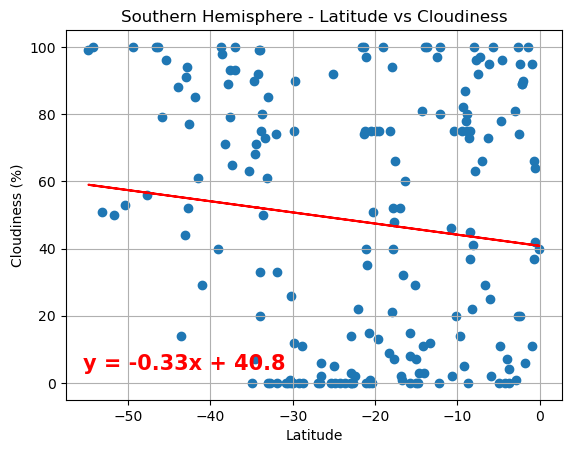

In [157]:
# Southern Hemisphere
x_south_cloud = southern_hemi_df['Lat']
y_south_cloud = southern_hemi_df['Cloudiness']

fig_south_cloud, ax_south_cloud = plt.subplots()
ax_south_cloud.scatter(x_south_cloud, y_south_cloud)
plt.title("Southern Hemisphere - Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

linreg_plot(ax_south_cloud, x_south_cloud, y_south_cloud, 60, 60)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.022858650696889846


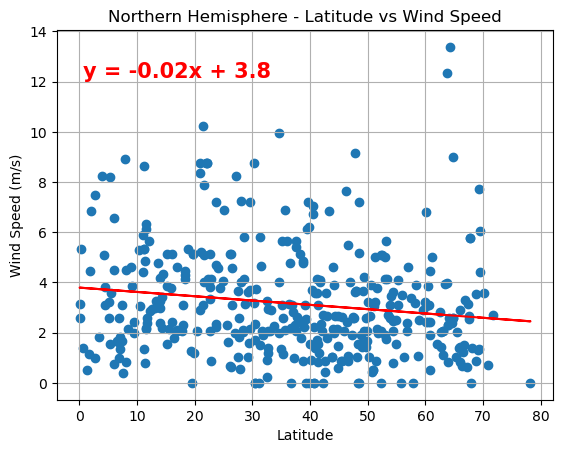

In [158]:
# Northern Hemisphere
x_north_wind = northern_hemi_df['Lat']
y_north_wind = northern_hemi_df['Wind Speed']

fig_north_wind, ax_north_wind = plt.subplots()
ax_north_wind.scatter(x_north_wind, y_north_wind)
plt.title("Northern Hemisphere - Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

linreg_plot(ax_north_wind, x_north_wind, y_north_wind, 60, 270)

The r-value is: 0.006398134836076935


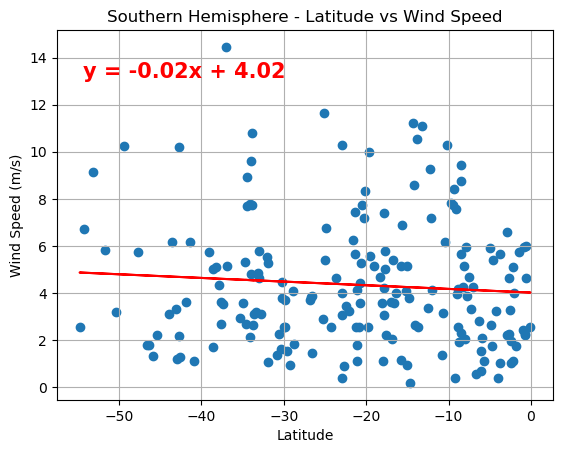

In [159]:
# Southern Hemisphere
x_south_wind = southern_hemi_df['Lat']
y_south_wind = southern_hemi_df['Wind Speed']

fig_south_wind, ax_south_wind = plt.subplots()
ax_south_wind.scatter(x_south_wind, y_south_wind)
plt.title("Southern Hemisphere - Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

linreg_plot(ax_south_wind, x_south_wind, y_south_wind, 60, 270)

**Discussion about the linear relationship:** YOUR RESPONSE HERE